In [1]:
! pip install -q pyyaml h5py  # Required to save models in HDF5 format

In [2]:
import tensorflow as tf
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.models import model_from_json
import datetime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import os
import cv2

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Mis datos, ya estan normalizados
x_train=np.load('/content/drive/My Drive/tesis aux/ojo1_train.npy')
y_train=np.load('/content/drive/My Drive/tesis aux/label1_train.npy')
x_test=np.load('/content/drive/My Drive/tesis aux/ojo1_valid.npy')
y_test=np.load('/content/drive/My Drive/tesis aux/label1_valid.npy')

In [ ]:
# Importante Falta normalizar los datos
x_train=np.load('/content/drive/My Drive/tesis aux/xtrain1.npy')
y_train=np.load('/content/drive/My Drive/tesis aux/ytrain1.npy')
x_test=np.load('/content/drive/My Drive/tesis aux/xvalid1.npy')
y_test=np.load('/content/drive/My Drive/tesis aux/yvalid1.npy')

In [ ]:
def normaliz(mat):
  si=mat.shape
  for i in range(si[0]):
    for j in range(si[1]):
      mat[i,j,:,:]=mat[i,j,:,:]/255.0
  return mat
x_train=normaliz(x_train)
x_test=normaliz(x_test)

In [14]:
os.chdir('/content/drive/My Drive')
model = tf.keras.models.load_model('saved_modelbyw1/my_model')

# Check its architecture
model.summary()
os.chdir('..')
os.chdir('..')

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 36, 44, 24)        1200      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 18, 22, 24)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 18, 24)        14424     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 9, 24)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 5, 7, 24)          5208      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 3, 24)          0         
_________________________________________________________________
flatten (Flatten)            (None, 144)               0

In [17]:
for i, layer in enumerate(model.layers):
    print(i, layer.name, layer.trainable)

0 conv2d False
1 max_pooling2d False
2 conv2d_1 False
3 max_pooling2d_1 False
4 conv2d_2 False
5 max_pooling2d_2 False
6 flatten True
7 dense_14 True
8 dense_15 True
9 dense_16 True
10 dense_17 True
11 dense_18 True
12 dense_19 True
13 dense_20 True


In [15]:
for layer in model.layers[6:]:
    layer.trainable = True
for layer in model.layers[:6]:
    layer.trainable = False
for i in range(1,7):
  model.pop()

In [16]:
model.add(Dense(128, activation='relu'))
#model.add(Dropout(0.4))
model.add(Dense(64, activation='relu'))
#model.add(Dropout(0.4))
model.add(Dense(32, activation='relu'))
#model.add(Dropout(0.3))
model.add(Dense(16, activation='relu'))                                                                       
#model.add(Dropout(0.3))
model.add(Dense(8, activation='relu'))  
#model.add(Dropout(0.3))
model.add(Dense(4, activation='relu'))                                                                      
model.add(Dense(2))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 36, 44, 24)        1200      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 18, 22, 24)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 18, 24)        14424     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 9, 24)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 5, 7, 24)          5208      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 3, 24)          0         
_________________________________________________________________
flatten (Flatten)            (None, 144)               0

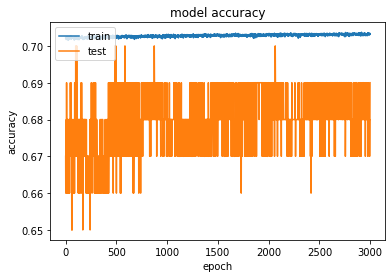

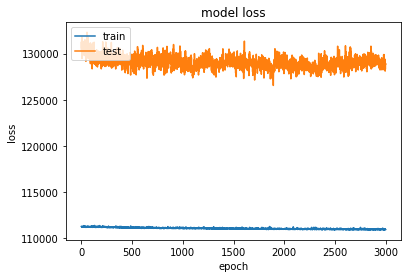

1001/1001 [==============================] - 2s 2ms/step - loss: 121960.0781 - accuracy: 0.6867


In [ ]:
with tf.device('/device:GPU:0'):
  history=model.fit(x_train, y_train, batch_size = 64, epochs=512, verbose=1,validation_data=(x_test[0:100], y_test[0:100]))
  # summarize history for accuracy
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  # summarize history for loss
  plt.plot(history.history['loss']) 
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  mse, test_acc = model.evaluate(x_test, y_test, verbose = 1)

In [ ]:
os.chdir('/content/drive/My Drive')
# Save the entire model as a SavedModel.
#!rm -dfr saved_modelbyw
!mkdir -p saved_modeldeep1
model.save('saved_modeldeep1/my_model')

# my_model directory
!ls saved_modeldeep1

# Contains an assets folder, saved_model.pb, and variables folder.
!ls saved_modeldeep1/my_model
os.chdir('..')
os.chdir('..') 

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: saved_modeldeep1/my_model/assets
my_model
assets	saved_model.pb	variables


In [ ]:
with tf.device('/device:GPU:0'):

  model = Sequential()
  model.add(Conv2D(24, kernel_size=(7, 7),activation='relu',input_shape=(42,50,3)))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(24, (5, 5), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(24, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.15))
  model.add(Flatten())
  model.add(Dense(100, activation='relu'))
  model.add(Dropout(0.2))
  model.add(Dense(32, activation='relu'))                                                                            
  model.add(Dense(2))
  optimizer = keras.optimizers.Adam()
  peldel=tf.keras.losses.MeanSquaredError(reduction="auto", name="mean_squared_error")


  model.compile(loss=peldel,optimizer=optimizer,metrics=['accuracy'])
  model.summary()
  model.fit(x_train[0:1000], y_train[0:1000], batch_size = 64, epochs=10, verbose= 1,validation_data=(x_test[0:150], y_test[0:150]))
  mse, test_acc = model.evaluate(x_test, y_test, verbose = 1)



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 36, 44, 24)        3552      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 18, 22, 24)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 18, 24)        14424     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 9, 24)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 5, 7, 24)          5208      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 2, 3, 24)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 2, 3, 24)         

In [ ]:
import sklearn.metrics as metrics
yfake=model.predict(x_test)
metrics.mean_squared_error(y_test, yfake)
print('El error cuadrático medio del modelo es: ',model.evaluate(x_test,y_test,verbose=0)[0])
print('La precisión del modelo es: ',model.evaluate(x_test,y_test,verbose=0)[1])

El error cuadrático medio del modelo es:  119475.890625
La precisión del modelo es:  0.6908954381942749


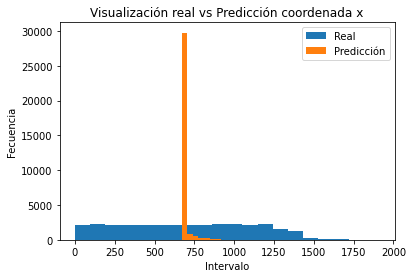

In [ ]:
plt.hist(y_test[:,0],bins=20)
plt.hist(model.predict(x_test)[:,0],bins=20)
plt.ylabel('Fecuencia')
plt.xlabel('Intervalo')
plt.title('Visualización real vs Predicción coordenada x')
plt.legend(['Real','Predicción'])

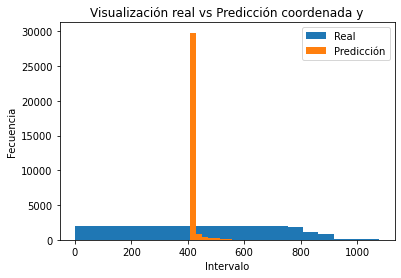

In [ ]:
plt.hist(y_test[:,1],bins=20)
plt.hist(model.predict(x_test)[:,1],bins=20)
plt.ylabel('Fecuencia')
plt.xlabel('Intervalo')
plt.title('Visualización real vs Predicción coordenada y')
plt.legend(['Real','Predicción'])

In [ ]:
#Pruebas de batch size
with tf.device('/device:GPU:0'):
  # Número de neuronas para la primera capa oculta
  # EDITABLE 
  # Completa con el vector de neuronas que quieres probar - Ejemplo: [50,100,200]
  batch= [2,16,32,64,256,512,2048]
  batch=batch[::-1]
  epocas = 100  # Completa con el número de epocas - Ejemplo: 5
  funcionDeActivacion = 'relu' # Completa con la función de activación - Determinada anteriormente
  algoritmoEntrenamiento = 'adam' # Completa con el algoritmo de entrenamiento - Determinado anteriormente
  # Comparación de exactitud
  best_acc = 0.5
  # Vector de exactitud
  accuracy_model = []
  # Vector de error
  loss_neurons = []
  for i in range(0,len(batch)):
    model = Sequential()
    model.add(Conv2D(24, kernel_size=(7, 7),activation='relu',input_shape=(42,50,1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(24, (5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(24, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.15))
    model.add(Flatten())
    model.add(Dense(8, activation='relu'))
    model.add(Dropout(0.05))
    model.add(Dense(4, activation='relu'))
    model.add(Dense(2))
    optimizer = keras.optimizers.Adam()
    #sumadre=int(1.875*batch[i])
    peldel=tf.keras.losses.MeanSquaredError(reduction="auto", name="mean_squared_error")

    model.compile(loss=peldel,optimizer=optimizer,metrics=['accuracy'])
    #model.summary()
    print("Entrenamiento con batch size: "+str(batch[i]))
    if batch[i]==16 or batch[i]==2:
      history=model.fit(byw, y_train, batch_size = batch[i], epochs=30, verbose= 0,validation_data=(bywt, y_test))
    else:
      history=model.fit(byw, y_train, batch_size = batch[i], epochs=130, verbose= 0,validation_data=(bywt, y_test))
    mse, test_acc = model.evaluate(bywt, y_test, verbose = 0)
    aux1, aux2 = model.evaluate(byw, y_train, verbose = 0)
    accuracy_model.append(test_acc)
    loss_neurons.append(mse)
    if accuracy_model[i] > best_acc:
      best_acc = accuracy_model[i]
      best_neurons_model = batch[i]
    print('TestAcc',test_acc,'TrainAcc',aux2)

    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss']) 
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()


  #clear_output(wait=True)
  print("Batch size con mejor exactitud: "+str(best_neurons_model))
  print("Exactitud: "+str(best_acc))

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss']) 
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Entrenamiento con: RMSprop
TestAcc 0.8937180042266846 TrainAcc 0.8953506350517273


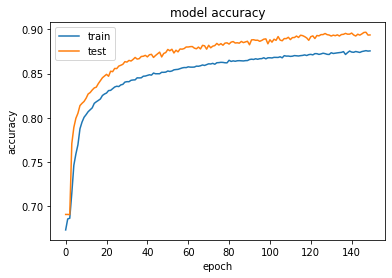

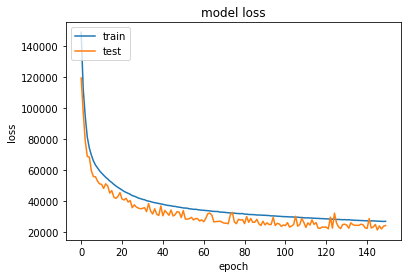

Entrenamiento con: Adam
TestAcc 0.8907830715179443 TrainAcc 0.8910619020462036


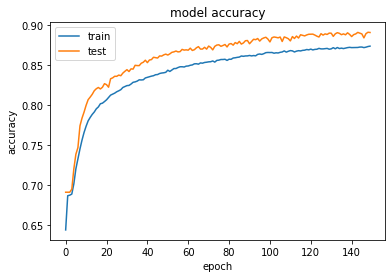

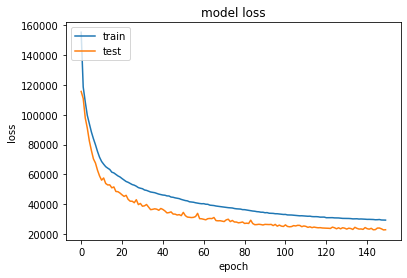

Entrenamiento con: Adadelta


In [ ]:
#Pruebas de optimizador
with tf.device('/device:GPU:0'):
  optim=['RMSprop','Adam','Adadelta','Adagrad','Nadam','Ftrl']
  # Comparación de exactitud
  best_acc = 0.5
  # Vector de exactitud
  accuracy_model = []
  # Vector de error
  loss_neurons = []
  for i in range(0,len(optim)):
    model = Sequential()
    model.add(Conv2D(24, kernel_size=(7, 7),activation='relu',input_shape=(42,50,1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(24, (5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(24, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(8, activation='relu'))
    model.add(Dropout(0.05))
    model.add(Dense(4, activation='relu'))
    model.add(Dense(2))
    optimizer = keras.optimizers.Adam()
    peldel=tf.keras.losses.MeanSquaredError(reduction="auto", name="mean_squared_error")

    model.compile(loss=peldel,optimizer=optim[i],metrics=['accuracy'])
    print("Entrenamiento con: "+str(optim[i]))

    history=model.fit(byw, y_train, batch_size=256, epochs=150, verbose= 0,validation_data=(bywt, y_test))
    mse, test_acc = model.evaluate(bywt, y_test, verbose = 0)
    aux1,aux2=model.evaluate(byw, y_train, verbose = 0)
    accuracy_model.append(test_acc)
    loss_neurons.append(mse)
    if accuracy_model[i] > best_acc:
      best_acc = accuracy_model[i]
      best_neurons_model = optim[i]
    print('TestAcc',test_acc,'TrainAcc',aux2)

    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss']) 
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

  print("Batch size con mejor exactitud: "+str(best_neurons_model))
  print("Exactitud: "+str(best_acc))


Entrenamiento con: Adadelta
TestAcc 0.6908642649650574 TrainAcc 0.6874703168869019


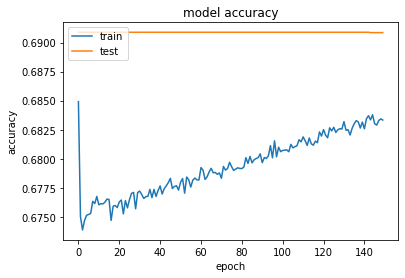

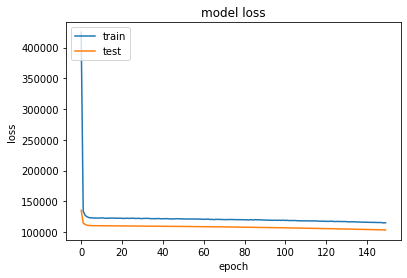

Entrenamiento con: Adagrad
TestAcc 0.7080679535865784 TrainAcc 0.7056489586830139


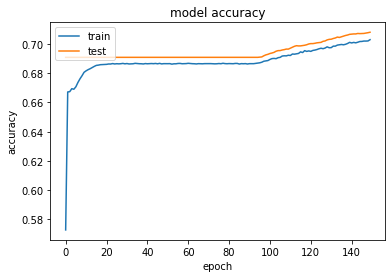

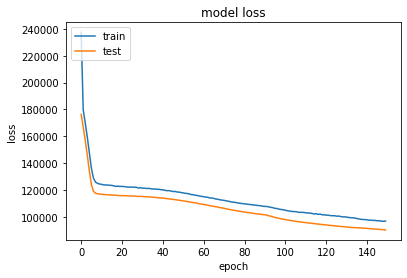

Entrenamiento con: Nadam
TestAcc 0.8985574841499329 TrainAcc 0.900990903377533


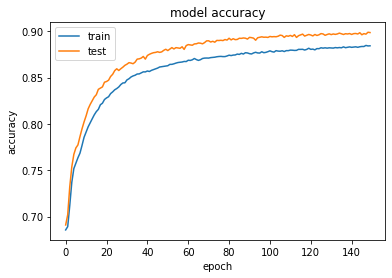

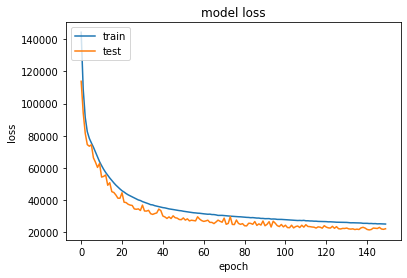

Entrenamiento con: Ftrl
TestAcc 0.6908954381942749 TrainAcc 0.6874769926071167


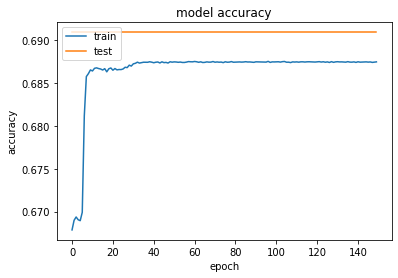

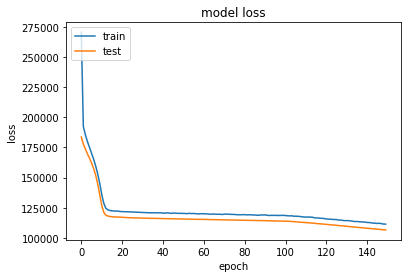

Batch size con mejor exactitud: Nadam
Exactitud: 0.8985574841499329


In [ ]:
#Pruebas de optimizador
with tf.device('/device:GPU:0'):
  optim=['Adadelta','Adagrad','Nadam','Ftrl']
  # Comparación de exactitud
  best_acc = 0.5
  # Vector de exactitud
  accuracy_model = []
  # Vector de error
  loss_neurons = []
  for i in range(0,len(optim)):
    model = Sequential()
    model.add(Conv2D(24, kernel_size=(7, 7),activation='relu',input_shape=(42,50,1)))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(24, (5, 5), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(24, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(8, activation='relu'))
    model.add(Dropout(0.05))
    model.add(Dense(4, activation='relu'))
    model.add(Dense(2))
    optimizer = keras.optimizers.Adam()
    peldel=tf.keras.losses.MeanSquaredError(reduction="auto", name="mean_squared_error")

    model.compile(loss=peldel,optimizer=optim[i],metrics=['accuracy'])
    print("Entrenamiento con: "+str(optim[i]))

    history=model.fit(byw, y_train, batch_size=256, epochs=150, verbose= 0,validation_data=(bywt, y_test))
    mse, test_acc = model.evaluate(bywt, y_test, verbose = 0)
    aux1,aux2=model.evaluate(byw, y_train, verbose = 0)
    accuracy_model.append(test_acc)
    loss_neurons.append(mse)
    if accuracy_model[i] > best_acc:
      best_acc = accuracy_model[i]
      best_neurons_model = optim[i]
    print('TestAcc',test_acc,'TrainAcc',aux2)

    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss']) 
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

  print("Batch size con mejor exactitud: "+str(best_neurons_model))
  print("Exactitud: "+str(best_acc))

In [ ]:
#color
import cv2
bas=x_train.shape[0]
byw=[]
for i in range(bas):
  image=x_train[i,:,:,:]
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  byw.append(gray)
byw=np.reshape(byw,(bas,42,50,1))/255

bas=x_test.shape[0]
bywt=[]
for i in range(bas):
  image=x_test[i,:,:,:]
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  bywt.append(gray)
bywt=np.reshape(bywt,(bas, 42, 50, 1))/255


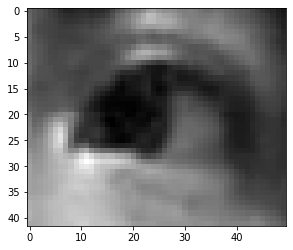

In [18]:
# Correr esto 
#byw
import cv2
bas=x_train.shape[0]
byw=[]
for i in range(bas):
  image=x_train[i,:,:]
  gray=cv2.resize(image,(50,42))
  byw.append(gray)
byw=np.reshape(byw,(bas, 42, 50,1))

bas=x_test.shape[0]
bywt=[]
for i in range(bas):
  image=x_test[i,:,:]
  gray=cv2.resize(image,(50,42))
  bywt.append(gray)
bywt=np.reshape(bywt,(bas, 42, 50, 1))
plt.imshow(byw[10,:,:,0],cmap='gray')

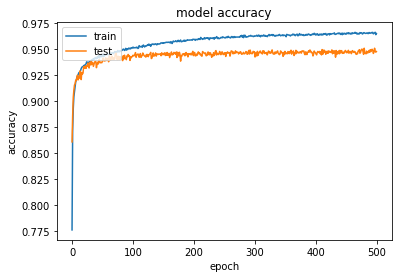

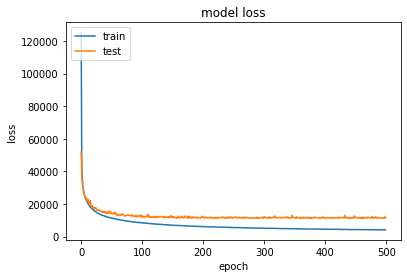

312/312 [==============================] - 1s 4ms/step - loss: 11282.4893 - accuracy: 0.9477


In [19]:
#Correr esto y descargar
with tf.device('/device:GPU:0'):
  history=model.fit(byw, y_train, batch_size = 64, epochs=500, verbose=0,validation_data=(bywt, y_test))
  # summarize history for accuracy
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  # summarize history for loss
  plt.plot(history.history['loss']) 
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  mse, test_acc = model.evaluate(bywt, y_test, verbose = 1)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 36, 44, 24)        1200      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 18, 22, 24)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 18, 24)        14424     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 9, 24)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 5, 7, 24)          5208      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 3, 24)          0         
_________________________________________________________________
flatten (Flatten)            (None, 144)               0

In [ ]:
while True:
  zzz=0

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 36, 44, 24)        1200      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 18, 22, 24)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 18, 24)        14424     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 9, 24)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 5, 7, 24)          5208      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 3, 24)          0         
_________________________________________________________________
flatten (Flatten)            (None, 144)               0

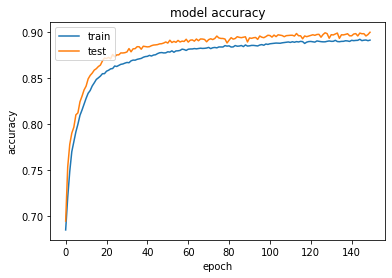

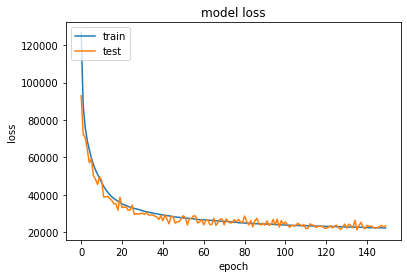

1001/1001 [==============================] - 2s 2ms/step - loss: 23499.4414 - accuracy: 0.9001


In [ ]:
with tf.device('/device:GPU:0'):

  model = Sequential()
  model.add(Conv2D(24, kernel_size=(7, 7),activation='relu',input_shape=(42,50,1)))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(24, (5, 5), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(24, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Flatten())
  model.add(Dropout(0.2))
  model.add(Dense(8, activation='relu'))
  model.add(Dropout(0.05))
  model.add(Dense(4, activation='relu'))
  model.add(Dense(2))
  optimizer = keras.optimizers.Adam()
  peldel=tf.keras.losses.MeanSquaredError(reduction="auto", name="mean_squared_error")

  model.compile(loss=peldel,optimizer=optimizer,metrics=['accuracy'])
  model.summary()
  history=model.fit(byw, y_train, batch_size = 64, epochs=150, verbose=1,validation_data=(bywt,y_test))

  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  # summarize history for loss
  plt.plot(history.history['loss']) 
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()  
  mse, test_acc = model.evaluate(bywt, y_test, verbose = 1)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 36, 44, 24)        1200      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 18, 22, 24)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 18, 24)        14424     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 9, 24)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 5, 7, 24)          5208      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 2, 3, 24)          0         
_________________________________________________________________
flatten (Flatten)            (None, 144)               0

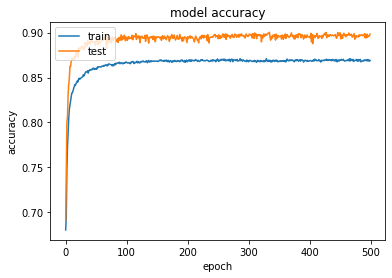

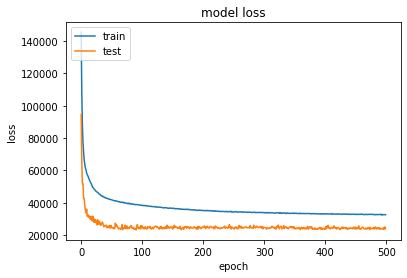

1001/1001 [==============================] - 3s 3ms/step - loss: 23927.0117 - accuracy: 0.8984


In [ ]:
with tf.device('/device:GPU:0'):

  model = Sequential()
  model.add(Conv2D(24, kernel_size=(7, 7),activation='relu',input_shape=(42,50,1),kernel_regularizer=tf.keras.regularizers.l1_l2(l1=1e-5, l2=1e-4)))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(24, (5, 5), activation='relu',kernel_regularizer=tf.keras.regularizers.l1_l2(l1=1e-5, l2=1e-4)))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Conv2D(24, (3, 3), activation='relu',kernel_regularizer=tf.keras.regularizers.l1_l2(l1=1e-5, l2=1e-4)))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Flatten())
  model.add(Dropout(0.6))
  model.add(Dense(100, activation='relu',kernel_regularizer=tf.keras.regularizers.l1_l2(l1=1e-5, l2=1e-4),bias_regularizer=tf.keras.regularizers.l2(1e-4),activity_regularizer=tf.keras.regularizers.l2(1e-5)))
  model.add(Dropout(0.5))
  model.add(Dense(32, activation='relu',kernel_regularizer=tf.keras.regularizers.l1_l2(l1=1e-5, l2=1e-4),bias_regularizer=tf.keras.regularizers.l2(1e-4),activity_regularizer=tf.keras.regularizers.l2(1e-5)))
  model.add(Dropout(0.4))
  model.add(Dense(2))
  optimizer = keras.optimizers.Adam()
  peldel=tf.keras.losses.MeanSquaredError(reduction="auto", name="mean_squared_error")

  model.compile(loss=peldel,optimizer=optimizer,metrics=['accuracy'])
  model.summary()
  history=model.fit(byw, y_train, batch_size = 64, epochs=500, verbose=1,validation_data=(bywt,y_test))

  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()
  # summarize history for loss
  plt.plot(history.history['loss']) 
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'test'], loc='upper left')
  plt.show()  
  mse, test_acc = model.evaluate(bywt, y_test, verbose = 1)


In [ ]:
model.evaluate(bywt, y_test, verbose = 1)

312/312 [==============================] - 1s 3ms/step - loss: 11402.8516 - accuracy: 0.9483


[11402.8515625, 0.9482810497283936]

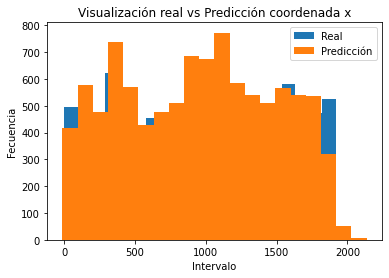

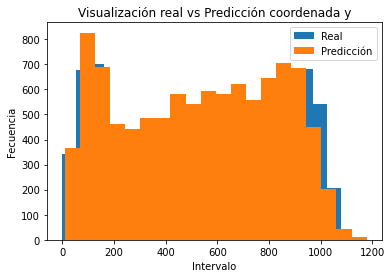

In [ ]:
plt.hist(y_test[:,0],bins=20)
plt.hist(model.predict(bywt)[:,0],bins=20)
plt.ylabel('Fecuencia')
plt.xlabel('Intervalo')
plt.title('Visualización real vs Predicción coordenada x')
plt.legend(['Real','Predicción'])
plt.show()


plt.hist(y_test[:,1],bins=20)
plt.hist(model.predict(bywt)[:,1],bins=20)
plt.ylabel('Fecuencia')
plt.xlabel('Intervalo')
plt.title('Visualización real vs Predicción coordenada y')
plt.legend(['Real','Predicción']) 
plt.show() 

In [ ]:
#0.6882
pred=model.predict(bywt)
print(np.mean(np.abs(model.predict(bywt))-np.abs(y_test)))
print(np.mean(pred)-np.mean(y_test))
#print(model.predict(bywt[10:15]))
#print(y_test[10:15])


-8.029377796803589
-8.030674928556436


In [ ]:
print(pred)
print(y_test)

[[1494.727     101.691986]
 [1441.8359    110.95384 ]
 [  57.277874  690.65436 ]
 ...
 [ 734.4829    816.4108  ]
 [1234.495     465.92148 ]
 [ 465.37207   538.06616 ]]
[[1638.  120.]
 [1489.  109.]
 [  21.  711.]
 ...
 [ 663.  804.]
 [1279.  355.]
 [ 424.  406.]]
